In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function 
#print('Print function from python 3')

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

import calendar
import datetime

In [2]:
df = pd.read_csv('turnstile_180310.txt')

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df['turnstile_id'] = df['C/A'] + '_' + df['UNIT'] + '_' + df['SCP'] + '_' + df['STATION']

In [5]:
df['date'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')

In [6]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile_id,date
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,03:00:00,REGULAR,6535802,2213345,A002_R051_02-00-00_59 ST,2018-03-03
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,07:00:00,REGULAR,6535813,2213356,A002_R051_02-00-00_59 ST,2018-03-03
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,11:00:00,REGULAR,6535865,2213436,A002_R051_02-00-00_59 ST,2018-03-03
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,15:00:00,REGULAR,6536048,2213481,A002_R051_02-00-00_59 ST,2018-03-03
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,19:00:00,REGULAR,6536326,2213531,A002_R051_02-00-00_59 ST,2018-03-03


In [7]:
df['DATE_TIME'] = df['DATE'] + ' ' + df['TIME']

In [8]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'],format="%m/%d/%Y %H:%M:%S")

In [9]:
df.sample(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile_id,date,DATE_TIME
15391,B020,R263,00-00-00,AVENUE H,BQ,BMT,03/08/2018,23:00:00,REGULAR,471409,197597,B020_R263_00-00-00_AVENUE H,2018-03-08,2018-03-08 23:00:00
103348,N545,R204,01-06-02,CHURCH AV,FG,IND,03/05/2018,03:00:00,REGULAR,6952270,2481754,N545_R204_01-06-02_CHURCH AV,2018-03-05,2018-03-05 03:00:00
143454,R194,R040,00-05-00,231 ST,1,IRT,03/04/2018,11:00:00,REGULAR,2510,0,R194_R040_00-05-00_231 ST,2018-03-04,2018-03-04 11:00:00
97248,N510,R163,02-06-00,14 ST,FLM123,IND,03/05/2018,23:00:00,REGULAR,7322906,13012615,N510_R163_02-06-00_14 ST,2018-03-05,2018-03-05 23:00:00
124331,R101,R001,02-00-08,SOUTH FERRY,1RW,IRT,03/09/2018,04:00:00,REGULAR,3927616,817635,R101_R001_02-00-08_SOUTH FERRY,2018-03-09,2018-03-09 04:00:00
182495,R527,R122,00-03-02,90 ST-ELMHURST,7,IRT,03/09/2018,12:12:46,REGULAR,14509659,4688726,R527_R122_00-03-02_90 ST-ELMHURST,2018-03-09,2018-03-09 12:12:46
97781,N513,R163,04-00-01,14 ST,FLM123,IND,03/03/2018,19:00:00,REGULAR,1251043,1043354,N513_R163_04-00-01_14 ST,2018-03-03,2018-03-03 19:00:00
159435,R250,R179,00-00-02,86 ST,456,IRT,03/06/2018,11:00:00,REGULAR,248677,84891,R250_R179_00-00-02_86 ST,2018-03-06,2018-03-06 11:00:00
112744,PTH03,R552,00-00-06,JOURNAL SQUARE,1,PTH,03/07/2018,23:40:11,REGULAR,1161913,255764,PTH03_R552_00-00-06_JOURNAL SQUARE,2018-03-07,2018-03-07 23:40:11
2668,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,03/03/2018,23:00:00,REGULAR,2451819,2872909,A021_R032_01-00-01_TIMES SQ-42 ST,2018-03-03,2018-03-03 23:00:00


In [10]:
df_temp=df[['turnstile_id','date','DATE_TIME','ENTRIES','EXITS','STATION']]

In [11]:
df_temp.head(10)

,turnstile_id,date,DATE_TIME,ENTRIES,EXITS,STATION
0,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 03:00:00,6535802,2213345,59 ST
1,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 07:00:00,6535813,2213356,59 ST
2,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 11:00:00,6535865,2213436,59 ST
3,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 15:00:00,6536048,2213481,59 ST
4,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 19:00:00,6536326,2213531,59 ST
5,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 23:00:00,6536487,2213562,59 ST
6,A002_R051_02-00-00_59 ST,2018-03-04,2018-03-04 03:00:00,6536518,2213570,59 ST
7,A002_R051_02-00-00_59 ST,2018-03-04,2018-03-04 07:00:00,6536526,2213579,59 ST
8,A002_R051_02-00-00_59 ST,2018-03-04,2018-03-04 11:00:00,6536576,2213626,59 ST
9,A002_R051_02-00-00_59 ST,2018-03-04,2018-03-04 15:00:00,6536723,2213669,59 ST


In [12]:
df_temp1=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME'])
 .groupby(['turnstile_id','date','STATION'])
 .diff())

In [13]:
df_temp1.head()

,DATE_TIME,ENTRIES,EXITS
0,NaT,NaN,NaN
1,04:00:00,11.0,11.0
2,04:00:00,52.0,80.0
3,04:00:00,183.0,45.0
4,04:00:00,278.0,50.0


In [14]:
df_temp2=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME']))

In [15]:
df_temp2.head()

,turnstile_id,date,DATE_TIME,ENTRIES,EXITS,STATION
0,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 03:00:00,6535802,2213345,59 ST
1,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 07:00:00,6535813,2213356,59 ST
2,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 11:00:00,6535865,2213436,59 ST
3,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 15:00:00,6536048,2213481,59 ST
4,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 19:00:00,6536326,2213531,59 ST


In [16]:
df_temp1['turnstile_id']=df_temp2['turnstile_id']

In [17]:
df_temp1['STATION']=df_temp2['STATION']

In [18]:
df_temp1['date']=df_temp2['date']

In [19]:
df_temp1.head(20)

,DATE_TIME,ENTRIES,EXITS,turnstile_id,STATION,date
0,NaT,NaN,NaN,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
1,04:00:00,11.0,11.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
2,04:00:00,52.0,80.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
3,04:00:00,183.0,45.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
4,04:00:00,278.0,50.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
5,04:00:00,161.0,31.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
6,NaT,NaN,NaN,A002_R051_02-00-00_59 ST,59 ST,2018-03-04
7,04:00:00,8.0,9.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04
8,04:00:00,50.0,47.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04
9,04:00:00,147.0,43.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04


In [20]:
df_temp1.dropna(axis=0,inplace=True)

In [21]:
df_final=pd.DataFrame()
df_final=df_temp1[['ENTRIES','turnstile_id','STATION','date']]

In [22]:
df_final.head()

,ENTRIES,turnstile_id,STATION,date
1,11.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
2,52.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
3,183.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
4,278.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
5,161.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03


In [23]:
df_final1=(df_final
 .groupby(['turnstile_id','date','STATION'])
 .sum())

In [24]:
df_final1['ENTRIES'].max()

10128.0

In [25]:
df_final1.reset_index(inplace=True)

In [26]:
df_anal=df_final1.reset_index()

In [27]:
df_anal.head()

,index,turnstile_id,date,STATION,ENTRIES
0,0,A002_R051_02-00-00_59 ST,2018-03-03,59 ST,685.0
1,1,A002_R051_02-00-00_59 ST,2018-03-04,59 ST,519.0
2,2,A002_R051_02-00-00_59 ST,2018-03-05,59 ST,1379.0
3,3,A002_R051_02-00-00_59 ST,2018-03-06,59 ST,1472.0
4,4,A002_R051_02-00-00_59 ST,2018-03-07,59 ST,979.0


In [28]:
station_entry_count = (df_final.groupby(by='STATION', as_index=False)
         .sum()[['STATION','ENTRIES']]
         .sort_values('ENTRIES', ascending=False))

In [29]:
top_20_station_entry_count=station_entry_count.head(20)

In [30]:
top_20_unique_station=top_20_station_entry_count['STATION'].unique()

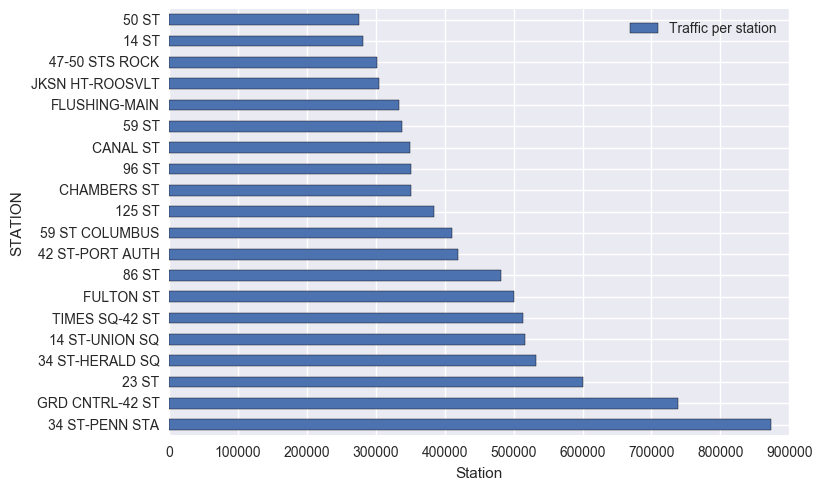

In [31]:
top_20_station_entry_count.plot(kind='barh', x='STATION', y='ENTRIES',label='Traffic per station')
plt.xlabel('Station')

In [32]:
x=top_20_station_entry_count['STATION'].values
y=top_20_station_entry_count['ENTRIES'].values

In [33]:
len(x)

20

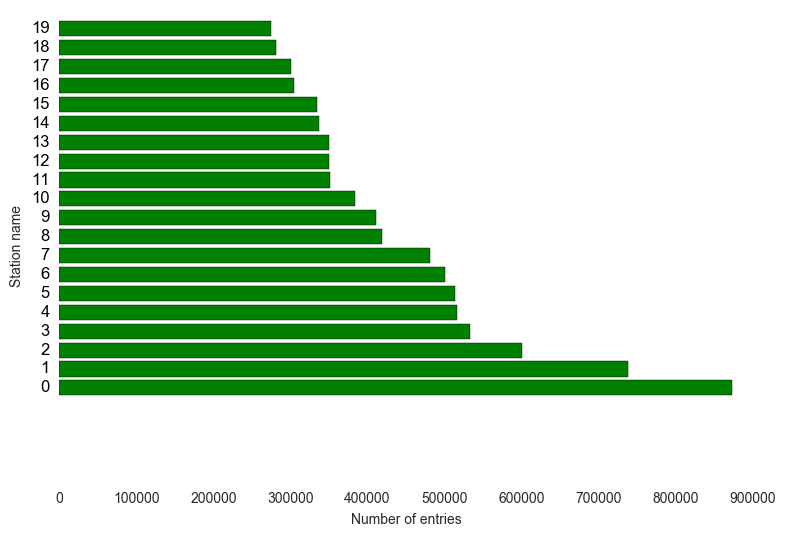

In [34]:
y_pos = np.arange(len(x))
fig=plt.figure(facecolor='white')
plt.box(on=None)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelleft='on') # labels along the bottom edge are off


plt.barh(y_pos, y,  align='center',
        color='green', ecolor='black')
#plt.set_yticks(y_pos)
# ax.set_yticklabels(x)
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Number of entries')
# ax.set_ylabel('Station name')
# ax.set_title('Top 20 station by volume')
plt.xlabel("Number of entries", fontsize = 10)
plt.ylabel("Station name", fontsize = 10)
plt.tick_params(labelsize=10)
plt.yticks(y_pos,color='black',fontsize=12)
plt.savefig('MTN.eps',format='eps',dpi=1000)
fig.tight_layout()
plt.show()

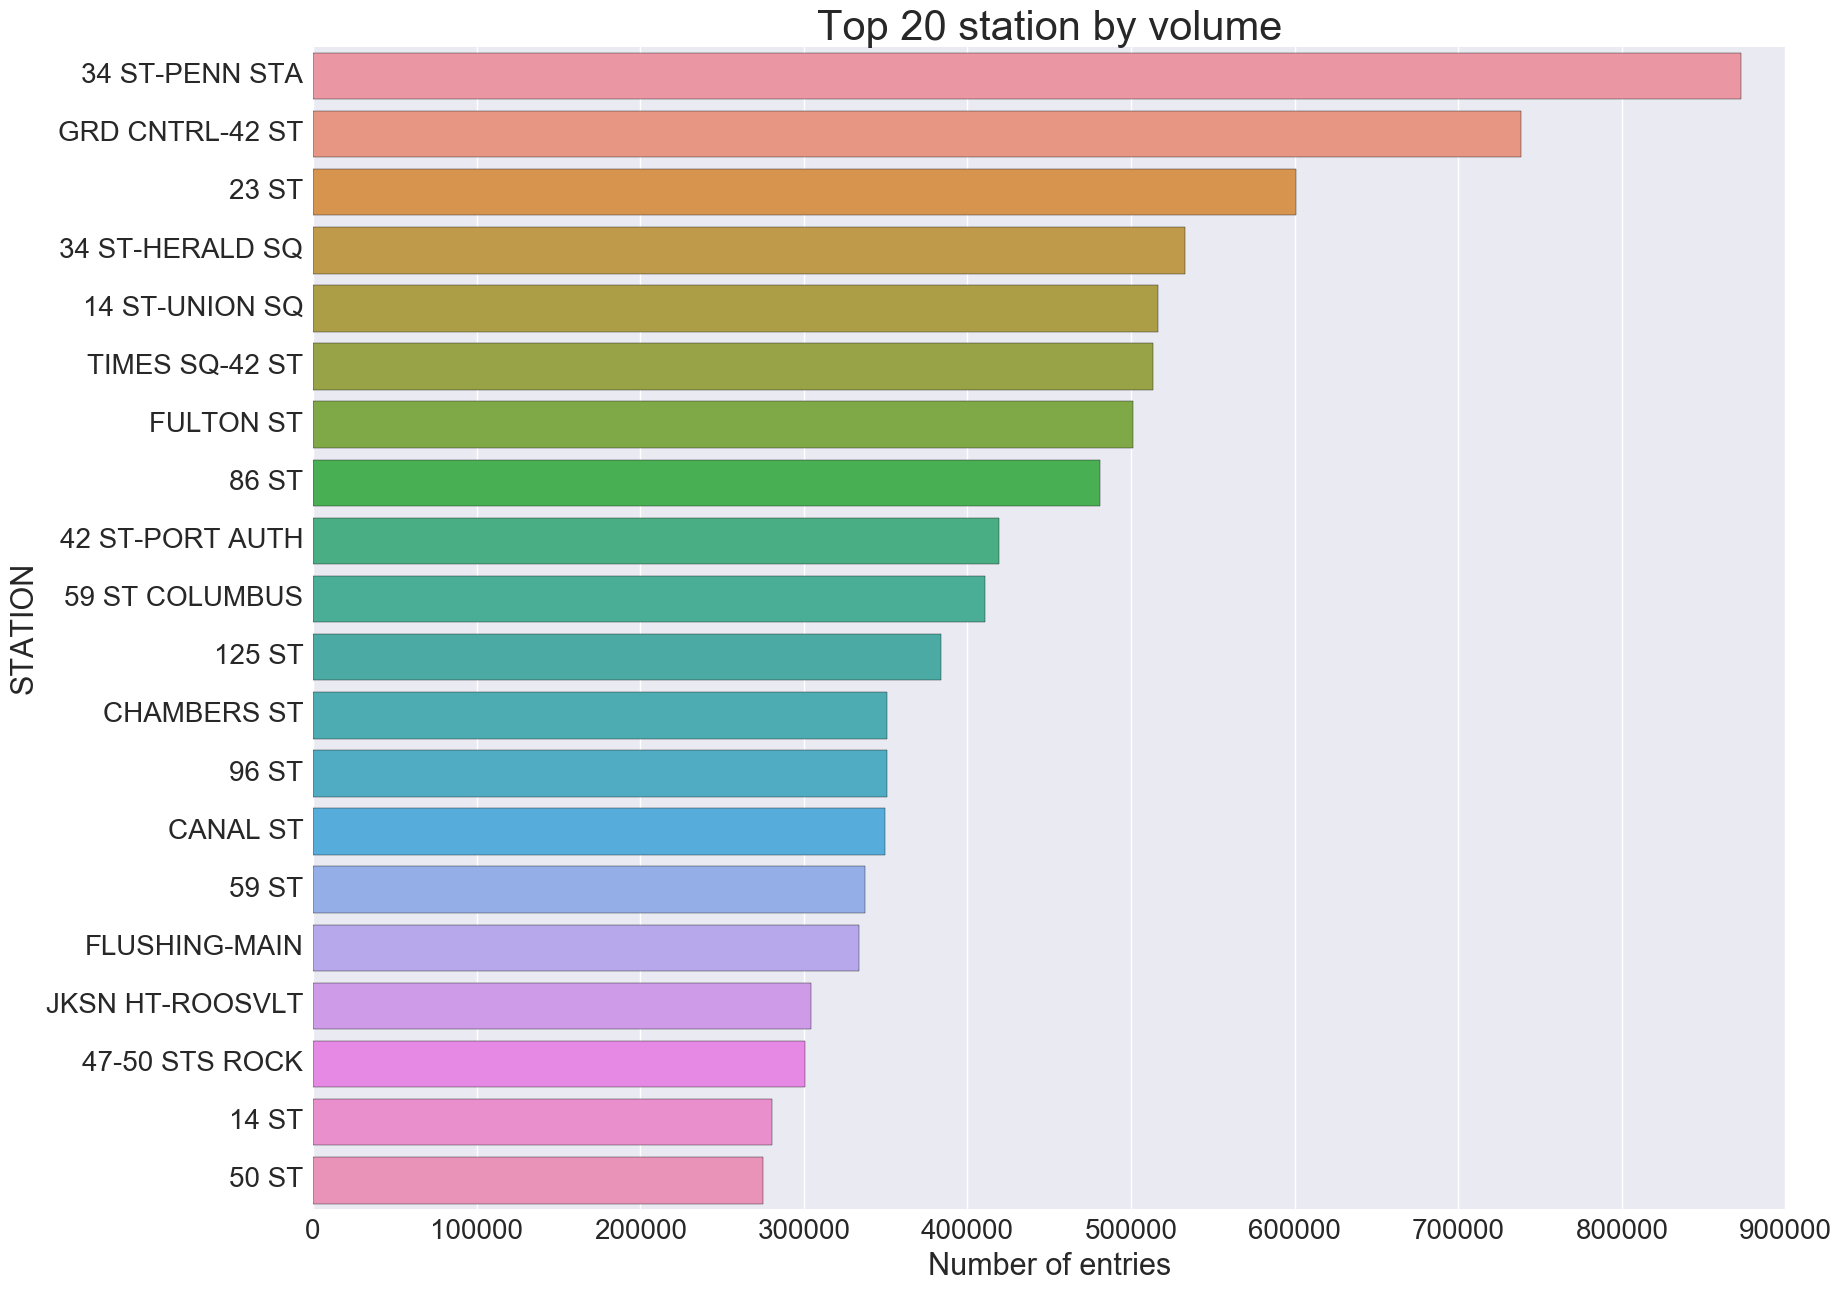

In [53]:
import matplotlib as mpl
mpl.rc('font', family='serif', serif='Times New Roman')
sns.reset_orig()
sns.set_style("white",
              {'xtick.major.size': 1.5,
               'ytick.major.size': 0.0,
               'xtick.direction': u'in',
               'axes.linewidth': 0.5,
               'axes.edgecolor': '.2',
               'grid.linestyle': u'-',
               'axes.labelcolor': '.05',
               'ytick.major.size': 0.0,
               'ytick.minor.size': 0.0,
               'ytick.direction': u'out',
               'axes.labelcolor': '.45',
               'text.color': '.05',
               'ytick.color': '.15',
               'grid.color': '.95'})
#sns.set_color_codes("pastel")
sns.set_context("talk")
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(19, 15))
sns.set(style="whitegrid")
np.random.seed(sum(map(ord, "aesthetics")))
ax=sns.barplot(y="STATION", x="ENTRIES", data=top_20_station_entry_count,
            label="Total");
sns.despine(left=True, bottom=True)
ax.set_title('Top 20 station by volume',fontsize=30)
ax.set_xlabel('Number of entries')
#ax.set_xticks([])
plt.savefig('MTN'+'.'+'png',format='png')
plt.show()
#ax.set_yticks([])

In [36]:
df_anal['day_of_week'] = [calendar.day_name[i.weekday()] for i in df_anal.date]

In [37]:
df_final.head()

,ENTRIES,turnstile_id,STATION,date
1,11.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
2,52.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
3,183.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
4,278.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
5,161.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03


In [38]:
df_anal=df_anal.groupby(by=['STATION','day_of_week']).sum()[['ENTRIES']].sort_values('ENTRIES', ascending=False)

In [39]:
df_anal.reset_index(inplace=True)

In [40]:
df_anal.head()

,STATION,day_of_week,ENTRIES
0,34 ST-PENN STA,Tuesday,170553.0
1,34 ST-PENN STA,Monday,163475.0
2,34 ST-PENN STA,Friday,153274.0
3,34 ST-PENN STA,Thursday,147467.0
4,GRD CNTRL-42 ST,Tuesday,147214.0


In [1]:
def plot_hbar(dF,s):
    from pylab import rcParams
    rcParams['legend.handlelength'] = 0.01
    sns.set_style("white",
              {'xtick.major.size': 1.5,
               'ytick.major.size': 0.0,
               'xtick.direction': u'in',
               'axes.linewidth': 0.5,
               'axes.edgecolor': '.2',
               'grid.linestyle': u'-',
               'axes.labelcolor': '.05',
               'ytick.major.size': 0.0,
               'ytick.minor.size': 1.0,
               'ytick.direction': u'out',
               'axes.labelcolor': '.45',
               'text.color': '.05',
               'ytick.color': '.15',
               'grid.color': '.95'})
    sns.set_color_codes("pastel")
    sns.set_context("talk")

    f, ax = plt.subplots(figsize=(17, 15))
    sns.set(style="whitegrid")
    np.random.seed(sum(map(ord, "aesthetics")))
    ax=sns.barplot(x='ENTRIES', y='day_of_week', data=dF,
            label=s);
    sns.despine(left=True, bottom=True)
    ax.set_title('Station by volume')
    ax.set_ylabel('Day of Week')
    ax.set_xlabel('Number of entries')
    #ax.set_xticks([])
    ax.legend(loc='lower right')
    plt.savefig(s+'.'+'png',format='png')
    plt.show()

In [2]:
for s in top_20_unique_station:
    df_new=pd.DataFrame()
    df_new=df_anal[df_anal['STATION']==s]
    plot_hbar(df_new,s)


NameError: name 'top_20_unique_station' is not defined

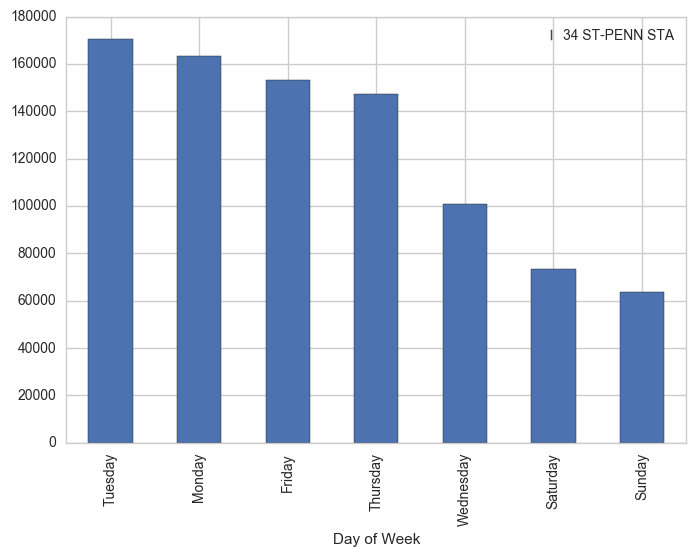

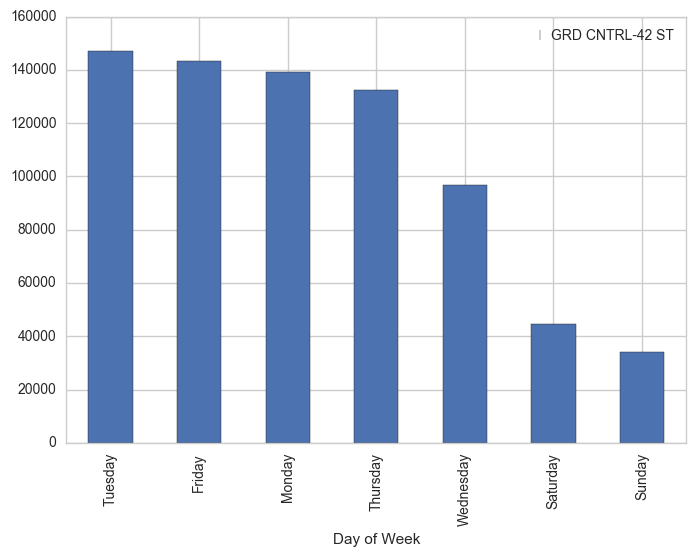

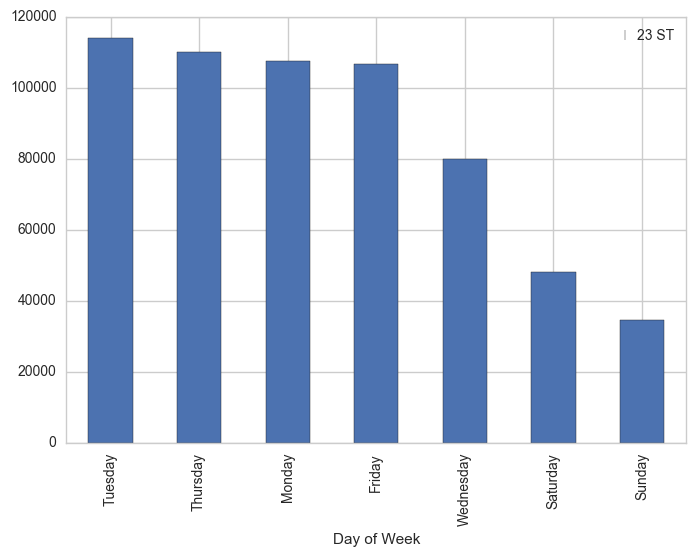

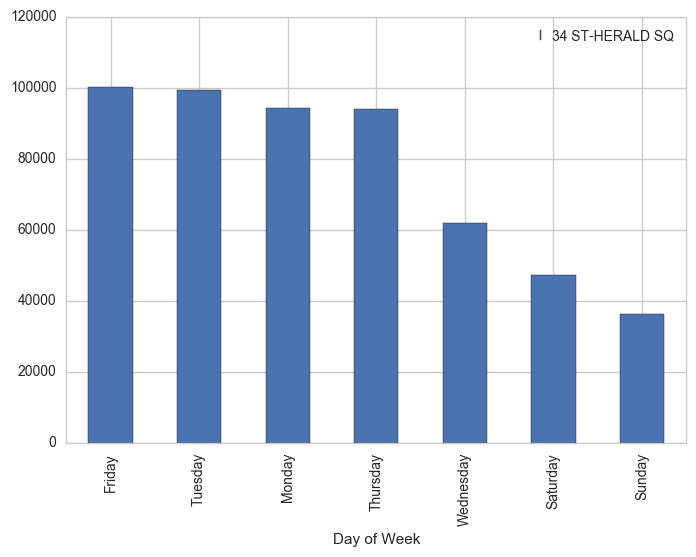

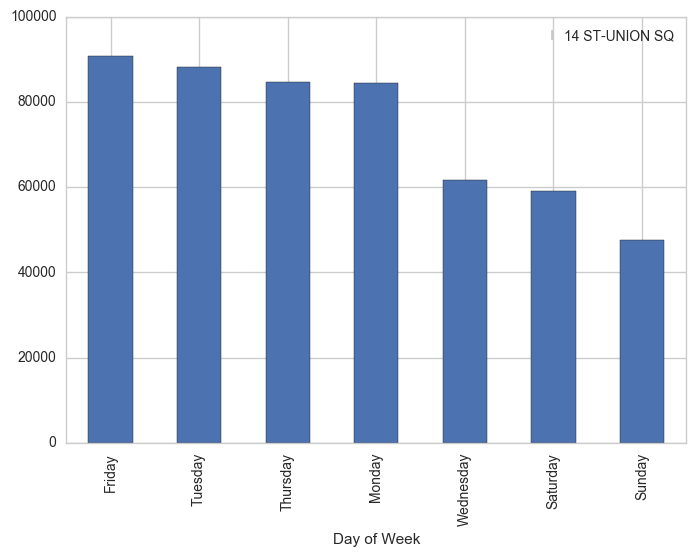

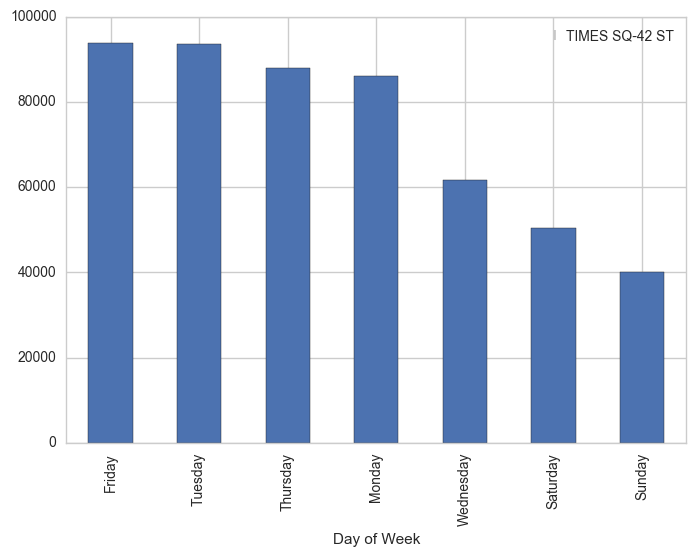

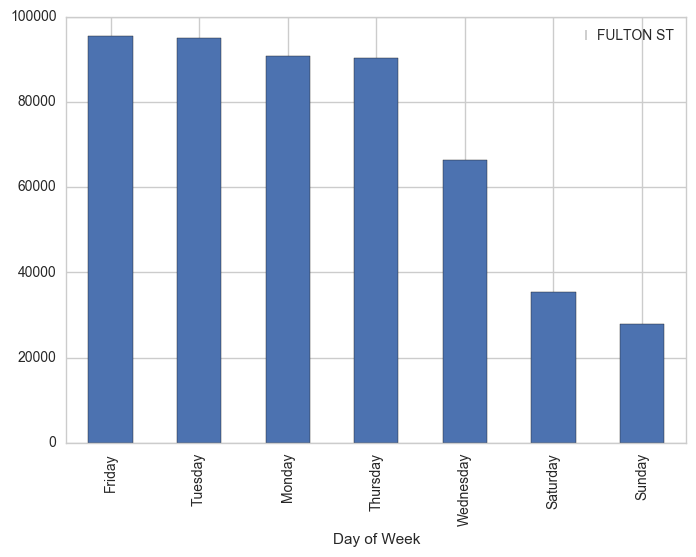

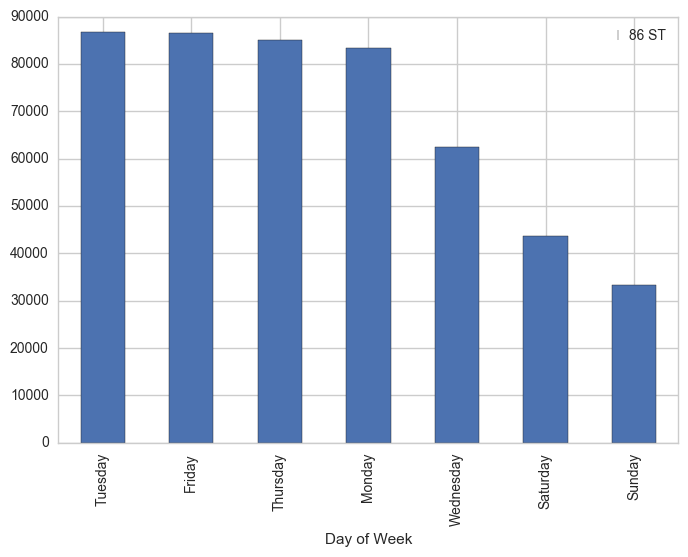

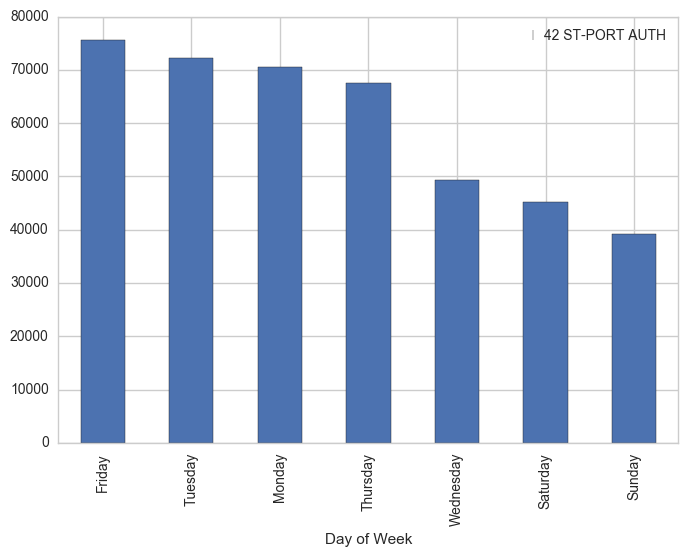

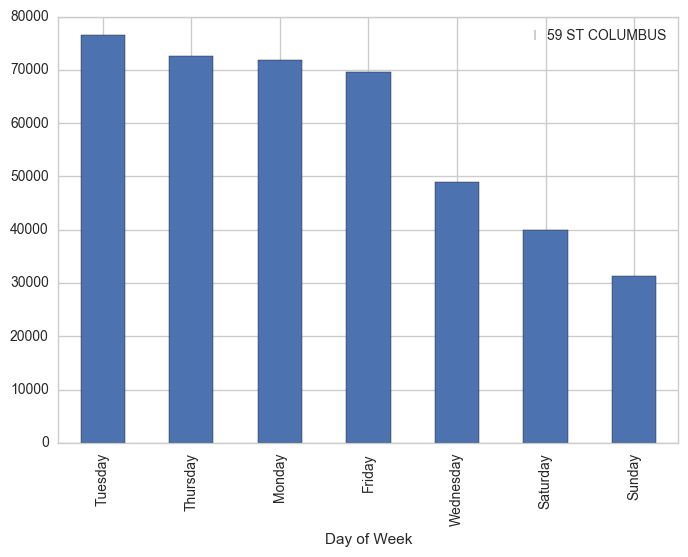

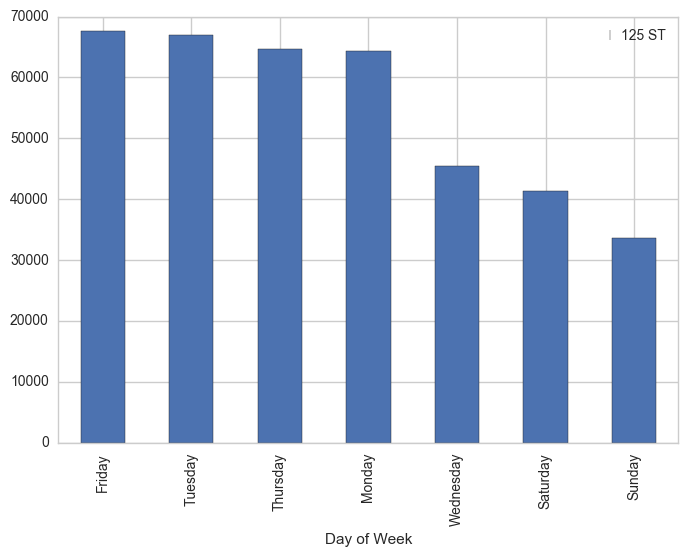

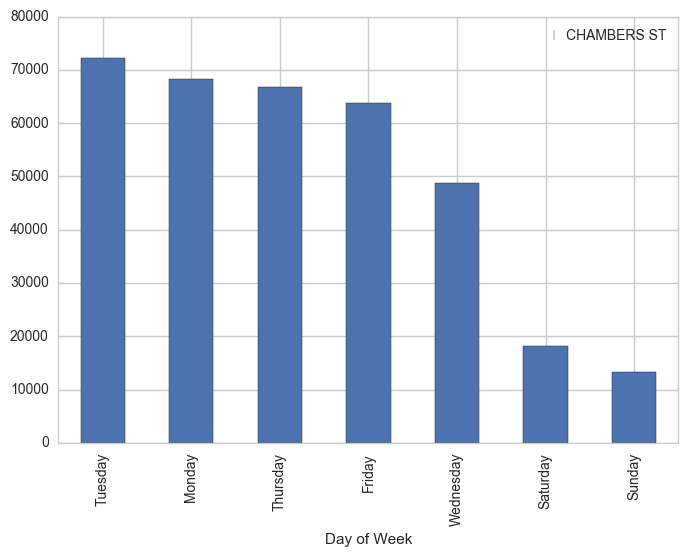

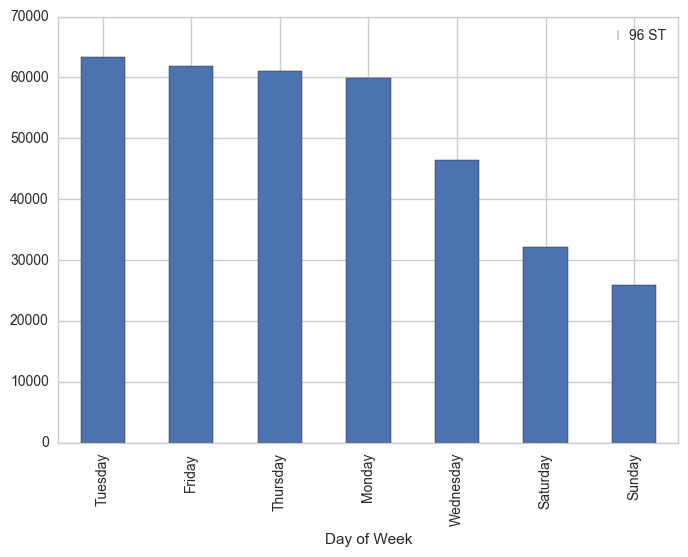

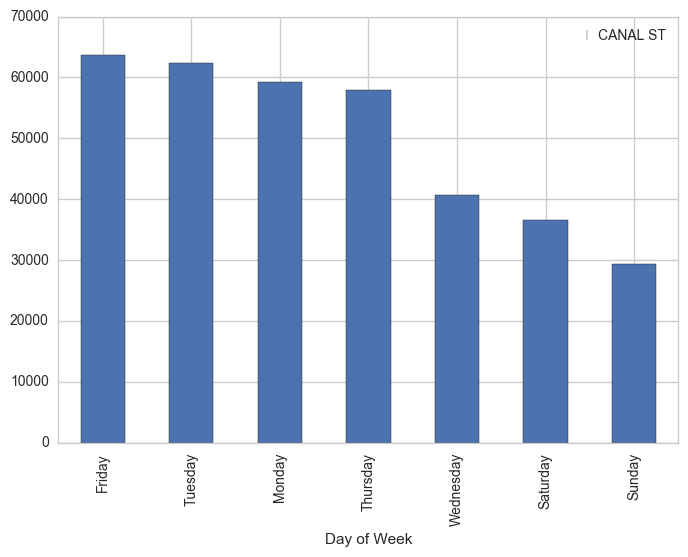

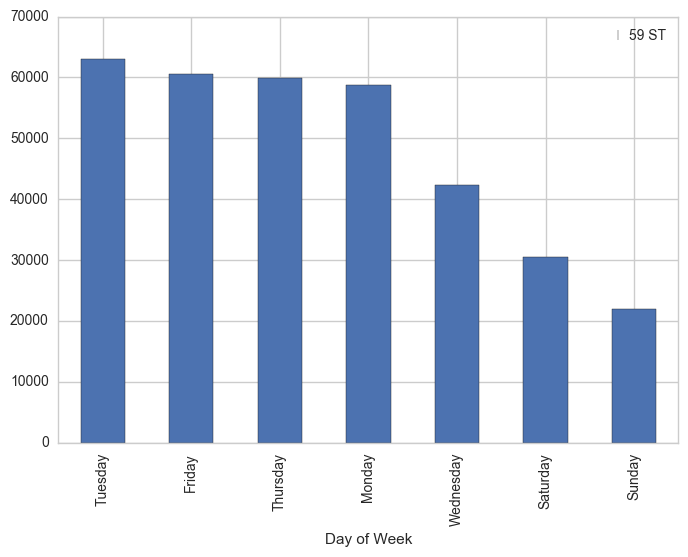

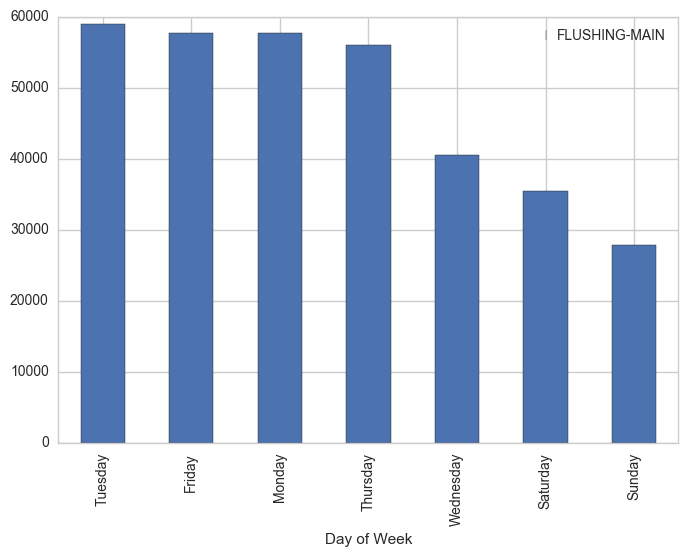

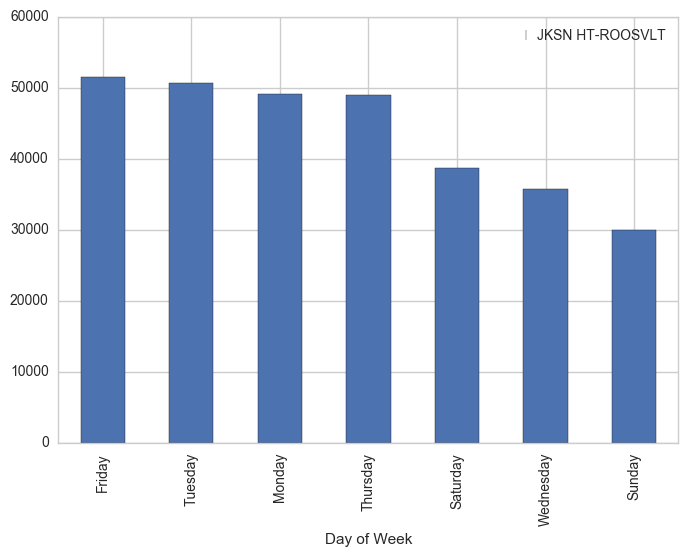

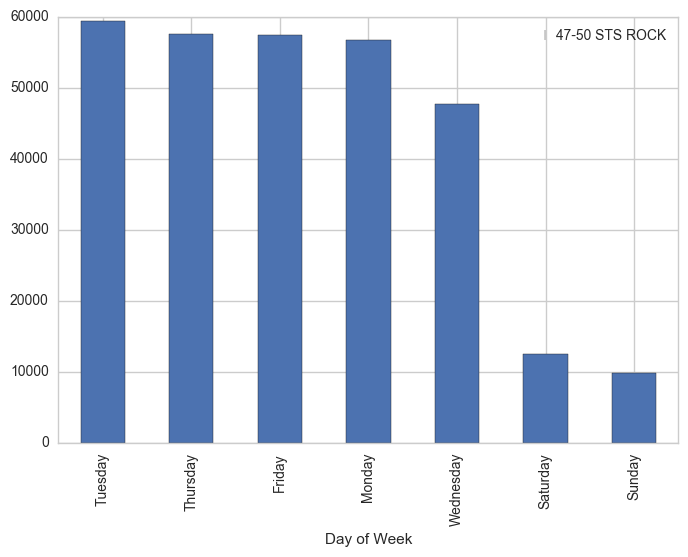

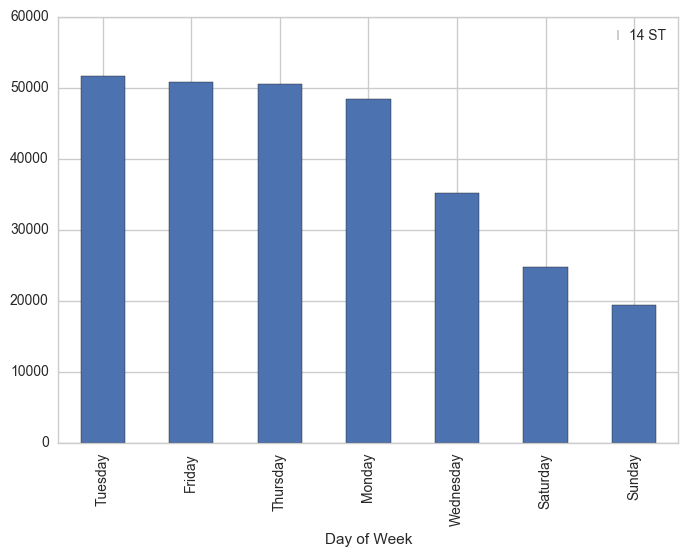

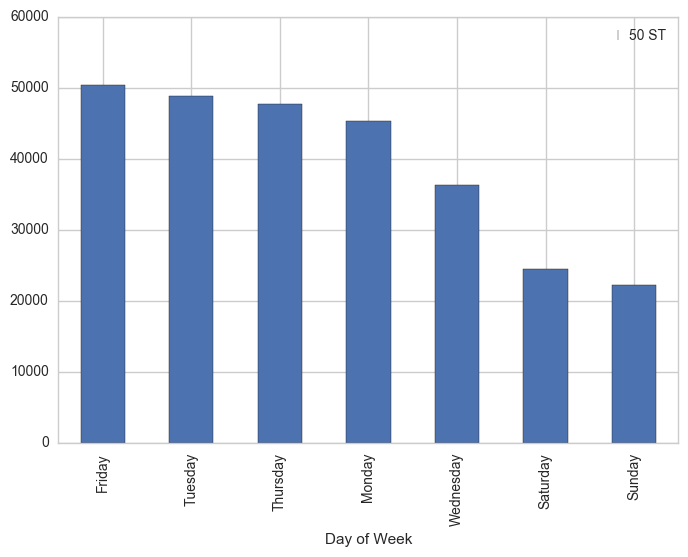

In [43]:
#df_list_kelly = []
for s in top_20_unique_station:
    #print(s)
    df_new=pd.DataFrame()
    df_new=df_anal[df_anal['STATION']==s]
    #df_list_kelly.append(df_new)
    df_new.plot(kind='bar', x='day_of_week', y='ENTRIES',label=s)
    plt.xlabel('Day of Week')
#df_kelly = pd.concat(df_list_kelly)    

In [44]:
df_kelly.head() 

NameError: name 'df_kelly' is not defined

In [ ]:
df_kelly_final=pd.DataFrame()
df_kelly_final=df_kelly[['STATION','ENTRIES']]

In [ ]:
df_kelly_final

In [ ]:
df_kelly_final.to_csv('for_kelly.csv',index= False)